# Second reparametrization of the $\mathcal{P}$ integral

#### Validation of the reparametrized form in terms of $\mathcal{K}$ and $\mathcal{L}$

Again, let's simply show that the reparametrized version is equivalent to the original version up to some value of $l$. As before, let's define a function to return $\mathcal{P}$ computed from its original parametrization:

In [32]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as pl
from sympy import binomial
%matplotlib inline
epsabs=1e-12
epsrel=1e-12

In [33]:
def P(l, m, b, r):
    """Compute the P integral numerically from its original parametrization."""
    mu = l - m
    nu = l + m
    if (np.abs(1 - r) < b) and (b < 1 + r):
        phi = np.arcsin((1 - r ** 2 - b ** 2) / (2 * b * r))
    else:
        phi = np.pi / 2
    if (mu / 2) % 2 == 0:
        func = lambda x, l, mu, nu, b, r: \
                    (r * np.cos(x)) ** (0.5 * (mu + 2)) * \
                    (b + r * np.sin(x)) ** (0.5 * nu) * \
                    r * np.cos(x)
    elif (mu == 1) and (l % 2 == 0):
        func = lambda x, l, mu, nu, b, r: \
                    -(r * np.cos(x)) ** (l - 2) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.sin(x)
    elif (mu == 1) and (l >= 3) and (l % 2 != 0):
        func = lambda x, l, mu, nu, b, r: \
                    -(r * np.cos(x)) ** (l - 3) * \
                    (b + r * np.sin(x)) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.sin(x)
    elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
        func = lambda x, l, mu, nu, b, r: \
                    (r * np.cos(x)) ** (0.5 * (mu - 3)) * \
                    (b + r * np.sin(x)) ** (0.5 * (nu - 1)) * \
                    (1 - r ** 2 - b ** 2 - 2 * b * r * np.sin(x)) ** (3. / 2.) * \
                    r * np.cos(x)
    elif (mu == 1) and (l == 1):
        raise ValueError("This case is treated separately.")
    else:
        return 0
    res, err = quad(func, np.pi - phi, 2 * np.pi + phi, args=(l, mu, nu, b, r), epsabs=epsabs, epsrel=epsrel)
    return res

Let's define all of the auxiliary integrals for the new parametrization, which we will evaluate numerically:

In [34]:
def I(v, kappa):
    """Return the integral I, evaluated numerically."""
    func = lambda x: np.sin(x) ** (2 * v)
    res, err = quad(func, -0.5 * kappa, 0.5 * kappa, epsabs=epsabs, epsrel=epsrel)
    return res

def J(v, kappa, k):
    """Return the integral J, evaluated numerically."""
    func = lambda x: np.sin(x) ** (2 * v) * (1 - k ** (-2) * np.sin(x) ** 2) ** 1.5
    res, err = quad(func, -0.5 * kappa, 0.5 * kappa, epsabs=epsabs, epsrel=epsrel)
    return res

def A(i, u, v, delta):
    """Compute the Vieta coefficient A_{i, u, v}."""
    j1 = max(0, u - i)
    j2 = min(u + v - i, u)
    return sum([float(binomial(u, j)) * 
                float(binomial(v, u + v - i - j)) * 
                (-1) ** (u + j) * delta ** (u + v - i - j) 
                for j in range(j1, j2 + 1)])

def K(u, v, kappa, delta):
    """Return the integral K, evaluated as a sum over I."""
    return sum([A(i, u, v, delta) * I(i + u, kappa) for i in range(u + v + 1)])

def L(u, v, t, kappa, delta, k):
    """Return the integral L, evaluated as a sum over J."""
    return k ** 3 * sum([A(i, u, v, delta) * J(i + u + t, kappa, k) for i in range(u + v + 1)])

Finally, we define $\mathcal{P}$ in its new parametrization:

In [35]:
def PKL(l, m, b, r):
    """Compute the P integral numerically from its new parametrization in terms of K and L."""
    mu = l - m
    nu = l + m
    if (np.abs(1 - r) < b) and (b < 1 + r):
        phi = np.arcsin((1 - r ** 2 - b ** 2) / (2 * b * r))
    else:
        phi = np.pi / 2
    kappa = phi + np.pi / 2
    delta = (b - r) / (2 * r)
    k = np.sqrt((1 - r ** 2 - b ** 2 + 2 * b * r) / (4 * b * r))
    if (mu / 2) % 2 == 0:
        return 2 * (2 * r) ** (l + 2) * \
               K((mu + 4) // 4, nu // 2, kappa, delta)
    elif (mu == 1) and (l % 2 == 0):
        return (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
               (L((l - 2) // 2, 0, 0, kappa, delta, k) - 
                2 * L((l - 2) // 2, 0, 1, kappa, delta, k))
    elif (mu == 1) and (l != 1) and (l % 2 != 0):
        return (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
               (L((l - 3) // 2, 1, 0, kappa, delta, k) - 
                2 * L((l - 3) // 2, 1, 1, kappa, delta, k))
    elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
        return 2 * (2 * r) ** (l - 1) * (4 * b * r) ** (3. / 2.) * \
               L((mu - 1) // 4, (nu - 1) // 2, 0, kappa, delta, k)
    elif (mu == 1) and (l == 1):
        raise ValueError("This case is treated separately.")
    else:
        return 0

/Users/rodrigo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


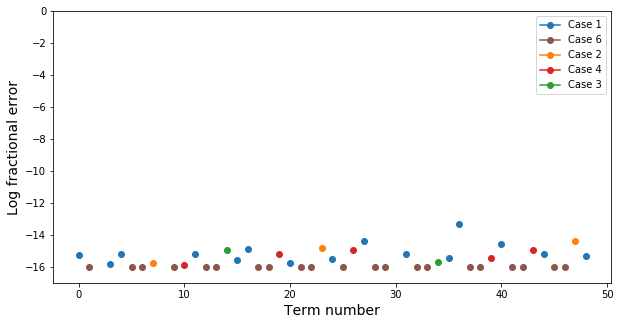

In [36]:
lmax = 6
fig, ax = pl.subplots(1, figsize=(10, 5))
labels = []
b = 0.8
r = 0.3

n = 0
for l in range(lmax + 1):
    for m in range(-l, l + 1):
        # Figure out which case this is
        mu = l - m
        nu = l + m
        if (mu / 2) % 2 == 0:
            case = 1
        elif (mu == 1) and (l % 2 == 0):
            case = 2
        elif (mu == 1) and (l != 1) and (l % 2 != 0):
            case = 3
        elif ((mu - 1) % 2) == 0 and ((mu - 1) // 2 % 2 == 0) and (l != 1):
            case = 4
        elif (mu == 1) and (l == 1):
            # Skip this case, which we treat separately
            n += 1
            continue
        else:
            case = 6
        
        # Compute the P integral using both methods
        P1 = P(l, m, b, r)
        P2 = PKL(l, m, b, r)
        if P1 == 0 and P2 == 0:
            err = 1e-16
        else:
            err = np.abs((P1 - P2) / P1)

        # Let's plot the error
        label = "Case %d" % case
        if label in labels:
            label = None
        labels.append(label)
        pl.plot(n, np.log10(err), marker='o', color='C%d' % (case - 1), label=label)
        n += 1

ax.set_ylim(-17, 0)
ax.set_xlabel('Term number', fontsize=14)
ax.set_ylabel('Log fractional error', fontsize=14)
ax.legend();

Looks good -- the two expressions are indeed equivalent for all cases.

■